In [1]:
import numpy as np
import pandas as pd

## Prerequisites

In [3]:
#!pip install tensorflow

In [4]:
#!pip install keras

## MNIST Dataset

이번 과제는 [MNIST 필기체 데이터셋](http://yann.lecun.com/exdb/mnist/)을 활용하여 필기체 이미지를 인식하는 이미지 인식 알고리즘을 Single-layer Neural Network로 작성합니다.

가로 28px, 세로 28px의 필기체 이미지가 주어지며, 필기체는 숫자 0부터 9까지 총 10개의 Label로 구성되어 있습니다. 이미지는 컬러가 없는 흑백 데이터이며, 한 픽셀의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)

데이터는 60,000개의 Train 데이터와 10,000개의 Test 데이터가 주어지는데, Train 데이터로 Single-layer Neural Network를 학습한 뒤 Test 데이터로 정확도(accuracy)를 측정합니다. 각 변수의 세부 정보는 다음과 같습니다.

  * **X_train**: **Train 데이터의 Feature** 입니다. 가로 28px, 세로 28px, 총 60,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)
  * **y_train**: **Train 데이터의 Label** 입니다. 총 60,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.
  * **X_test**: **Test 데이터의 Feature** 입니다. 가로 28px, 세로 28px, 총 10,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)
  * **y_test**: **Test 데이터의 Label** 입니다. 총 10,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.

In [6]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


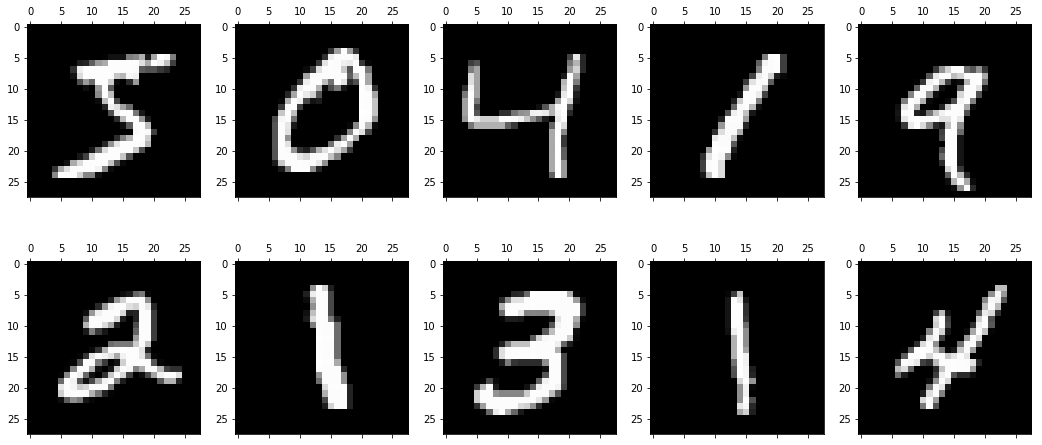

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [8]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [9]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape)
print(y_test_hot.shape)

(60000, 10)
(10000, 10)


### Define Sigmoid

In [10]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

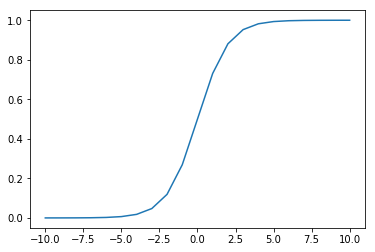

In [11]:
xx = np.linspace(-10, 10, num=21)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [12]:
num_epoch = 1000
learning_rate = 0.1

w = np.random.uniform(low=0.0, high=1.0, size=(784, 10))
b = np.random.uniform(low=0.0, high=1.0, size=(1, 10))

for epoch in range(num_epoch):
    y_predict_hot = X_train.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)

    y_predict = y_predict_hot.argmax(axis=1)
    
    error = (y_predict != y_train).mean()
    
    if error < 0.05:
        break

    if epoch % 100 == 0:
        print("{0:2} error = {1:.6f}".format(epoch, error))
    
    w = w - learning_rate * X_train.T.dot(y_predict_hot - y_train_hot)
    b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0)

print("----" * 10)
print("{0:2} error = {1:.6f}".format(epoch, error))

 0 error = 0.901283


C:\AI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


100 error = 0.327533
200 error = 0.166500
300 error = 0.139150
400 error = 0.236717
500 error = 0.179200
600 error = 0.172750
700 error = 0.230450
800 error = 0.236833
900 error = 0.259383
----------------------------------------
999 error = 0.163517


In [13]:
y_predict_hot = X_train.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

result = pd.DataFrame(X_train)
result["number(actual)"] = y_train
result["number(predict)"] = y_predict

print(result.shape)
result.head()

(60000, 786)


C:\AI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,number(actual),number(predict)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,9


In [14]:
result["accuracy"] = result["number(actual)"] == result["number(predict)"]
result["accuracy"].mean()

0.86303333333333332